# Model training and evaluation (static data)

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
df_results = pd.DataFrame()

In [3]:
# metrics for each class + weighted average (- bad impact)
# micro f1 = accuracy
def print_metrics(cls):
    global df_results
    
    predicted = cls.predict(X_test)
    sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True, fmt='g', annot_kws={"size": 16})
    print('accuracy: ',metrics.accuracy_score(y_test, predicted))
    print()
    print(metrics.classification_report(y_test, predicted))
    print('macro precision: ',metrics.precision_score(y_test, predicted, average='macro'))
    print('micro precision: ',metrics.precision_score(y_test, predicted, average='micro'))
    print()
    print('micro recall: ',metrics.recall_score(y_test, predicted, average='micro'))
    print('macro recall: ',metrics.recall_score(y_test, predicted, average='macro'))
    print()
    print('micro f1: ',metrics.f1_score(y_test, predicted, average='micro'))
    print('macro f1: ',metrics.f1_score(y_test, predicted, average='macro'))
    
    df_result = pd.DataFrame({
        'Algoritmus': [str(cls).split('(')[0]],
        
        'Transformácia': ['áno' if transformed else 'nie'],
        
        'S': [round(metrics.accuracy_score(y_test, predicted), 2)],
        
        'P_0': [round(precision_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'P_1': [round(precision_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'P_2': [round(precision_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'P_3': [round(precision_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'Ú_0': [round(recall_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'Ú_1': [round(recall_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'Ú_2': [round(recall_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'Ú_3': [round(recall_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'F1_makro': [round(metrics.f1_score(y_test, predicted, average='macro'), 2)],
    })
        
    df_results = df_results.append(df_result, ignore_index=True)
    
    plt.show()

In [4]:
def train_eval(classifier, rand_state = False, **kwargs):
    if rand_state:
        cls = classifier(random_state=16, **kwargs)
    else:
        cls = classifier(**kwargs)
    cls.fit(X_train, y_train)
    print_metrics(cls)

In [5]:
# prepare categorical features (one hot encoded)
categorical_train = pd.read_csv('data/split/transformed/train_categories.csv', index_col=0)
categorical_test = pd.read_csv('data/split/transformed/test_categories.csv', index_col=0)

In [6]:
categorical_train.shape

(18296, 60)

In [7]:
categorical_test.shape

(6099, 60)

## Original data (no scaling, no normalization)

In [8]:
# prepare original data 
X_train = pd.read_csv('data/split/transformed/train_original.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test_original.csv', index_col=0)

# merge with categorical
X_train = pd.concat([X_train, categorical_train], axis=1)
X_test = pd.concat([X_test, categorical_test], axis=1)

# as we will use only static (meta) data, we can use all projects for prediction
#X_train = X_train[(X_train['ratio_running_duration'] >= 0) & (X_train['ratio_running_duration'] < 25)]
#X_test = X_test[(X_test['ratio_running_duration'] >= 0) & (X_test['ratio_running_duration'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop('class', axis=1, inplace=True)
X_test.drop('class', axis=1, inplace=True)

In [9]:
X_train.shape

(18296, 101)

In [10]:
X_test.shape

(6099, 101)

In [11]:
dynamic_data = [
    'average_pledge',
    'backers_count',
    'days_remaining',
    'days_running',
    'pledged',
    'ratio_pledged_goal',
    'ratio_running_duration',
    'staff_pick',
    'usd_pledged',
    'faq_count_while_scraping',
    'comments_count_creator_while_scraping',
    'comments_count_public_while_scraping',
    'updates_count_while_scraping',
    'updates_likes_sum_while_scraping',
    'updates_likes_mean_while_scraping',
    'updates_likes_min_while_scraping',
    'updates_likes_max_while_scraping',
    'updates_likes_median_while_scraping'
]

In [12]:
X_train.drop(dynamic_data, axis=1, inplace=True)
X_test.drop(dynamic_data, axis=1, inplace=True)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18296 entries, 0 to 18295
Data columns (total 83 columns):
category_position               18296 non-null int64
days_duration                   18296 non-null int64
days_preparation                18296 non-null int64
db_duration                     18296 non-null int64
goal                            18296 non-null float64
usd_goal                        18296 non-null int64
deadline_year                   18296 non-null int64
deadline_month                  18296 non-null int64
deadline_day                    18296 non-null int64
deadline_dayofweek              18296 non-null int64
deadline_hour                   18296 non-null int64
launch_year                     18296 non-null int64
launch_month                    18296 non-null int64
launch_day                      18296 non-null int64
launch_dayofweek                18296 non-null int64
launch_hour                     18296 non-null int64
image_count                     18296 non

In [14]:
transformed = False

## Classifiers

accuracy:  0.522872602066

             precision    recall  f1-score   support

          1       0.61      0.77      0.68      2580
          2       0.27      0.01      0.02       772
          3       0.46      0.28      0.35      1385
          4       0.41      0.59      0.48      1362

avg / total       0.49      0.52      0.48      6099

macro precision:  0.437578456488
micro precision:  0.522872602066

micro recall:  0.522872602066
macro recall:  0.412467816313

micro f1:  0.522872602066
macro f1:  0.381919267008


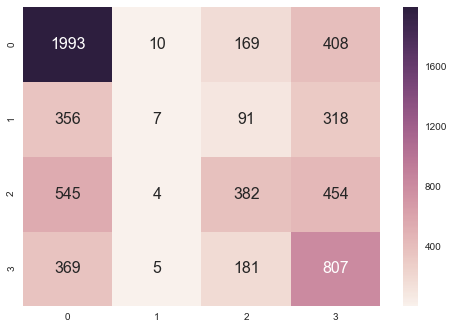

In [15]:
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.519101492048

             precision    recall  f1-score   support

          1       0.71      0.68      0.69      2580
          2       0.25      0.27      0.26       772
          3       0.41      0.42      0.41      1385
          4       0.45      0.45      0.45      1362

avg / total       0.53      0.52      0.52      6099

macro precision:  0.455299757745
micro precision:  0.519101492048

micro recall:  0.519101492048
macro recall:  0.456366885698

micro f1:  0.519101492048
macro f1:  0.455678613828


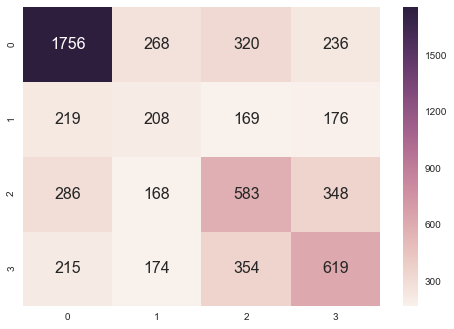

In [16]:
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.489260534514

             precision    recall  f1-score   support

          1       0.65      0.64      0.64      2580
          2       0.25      0.26      0.25       772
          3       0.40      0.41      0.40      1385
          4       0.44      0.42      0.43      1362

avg / total       0.49      0.49      0.49      6099

macro precision:  0.430762816669
micro precision:  0.489260534514

micro recall:  0.489260534514
macro recall:  0.430806700287

micro f1:  0.489260534514
macro f1:  0.43069849589


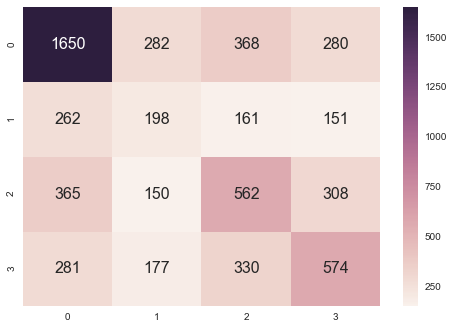

In [17]:
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.579767174947

             precision    recall  f1-score   support

          1       0.66      0.84      0.74      2580
          2       0.35      0.20      0.25       772
          3       0.48      0.44      0.46      1385
          4       0.55      0.46      0.50      1362

avg / total       0.56      0.58      0.56      6099

macro precision:  0.510527477807
micro precision:  0.579767174947

micro recall:  0.579767174947
macro recall:  0.481580559782

micro f1:  0.579767174947
macro f1:  0.486585254966


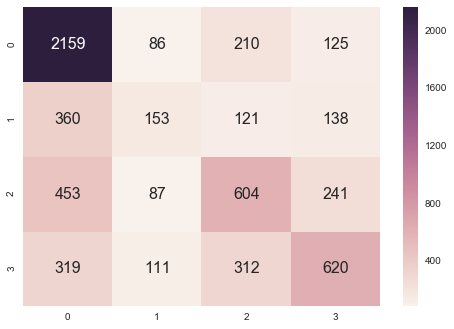

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.26676504345

             precision    recall  f1-score   support

          1       0.92      0.08      0.15      2580
          2       0.14      0.08      0.10       772
          3       0.25      0.93      0.39      1385
          4       0.23      0.05      0.08      1362

avg / total       0.51      0.27      0.18      6099

macro precision:  0.383813956551
micro precision:  0.26676504345

micro recall:  0.26676504345
macro recall:  0.284848170281

micro f1:  0.26676504345
macro f1:  0.182096015354


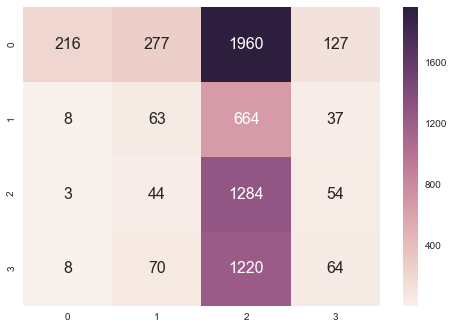

In [19]:
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.467289719626

             precision    recall  f1-score   support

          1       0.56      0.75      0.64      2580
          2       0.18      0.12      0.14       772
          3       0.33      0.29      0.31      1385
          4       0.46      0.31      0.37      1362

avg / total       0.44      0.47      0.44      6099

macro precision:  0.382717680485
micro precision:  0.467289719626

micro recall:  0.467289719626
macro recall:  0.367116746708

micro f1:  0.467289719626
macro f1:  0.365764769325


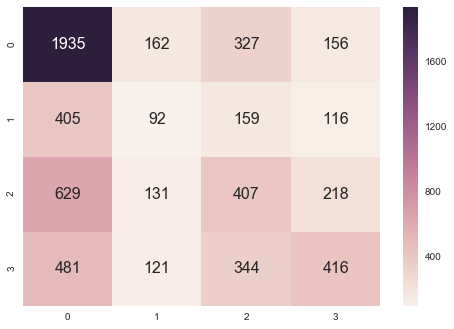

In [20]:
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy:  0.542056074766

             precision    recall  f1-score   support

          1       0.58      0.84      0.69      2580
          2       0.00      0.00      0.00       772
          3       0.45      0.34      0.39      1385
          4       0.51      0.48      0.50      1362

avg / total       0.46      0.54      0.49      6099

macro precision:  0.385244360513
micro precision:  0.542056074766

micro recall:  0.542056074766
macro recall:  0.417077306778

micro f1:  0.542056074766
macro f1:  0.39336091198


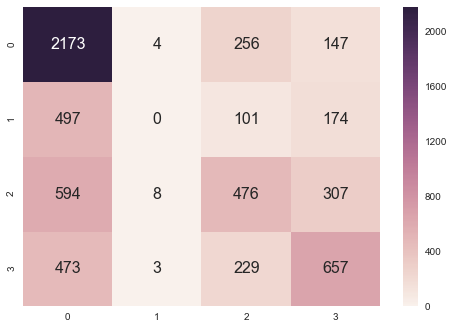

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

In [22]:
#from sklearn.svm import LinearSVC
#train_eval(LinearSVC, True, multi_class='crammer_singer')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


accuracy:  0.56484669618

             precision    recall  f1-score   support

          1       0.62      0.86      0.72      2580
          2       0.29      0.02      0.03       772
          3       0.47      0.34      0.39      1385
          4       0.51      0.55      0.53      1362

avg / total       0.52      0.56      0.52      6099

macro precision:  0.469924321658
micro precision:  0.56484669618

micro recall:  0.56484669618
macro recall:  0.440733987485

micro f1:  0.56484669618
macro f1:  0.417561320501


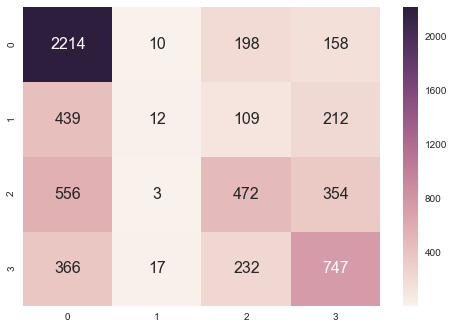

In [23]:
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.506476471553

             precision    recall  f1-score   support

          1       0.54      0.91      0.68      2580
          2       0.00      0.00      0.00       772
          3       0.30      0.18      0.22      1385
          4       0.52      0.36      0.42      1362

avg / total       0.41      0.51      0.43      6099

macro precision:  0.339837895959
micro precision:  0.506476471553

micro recall:  0.506476471553
macro recall:  0.362349470948

micro f1:  0.506476471553
macro f1:  0.332117407639


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

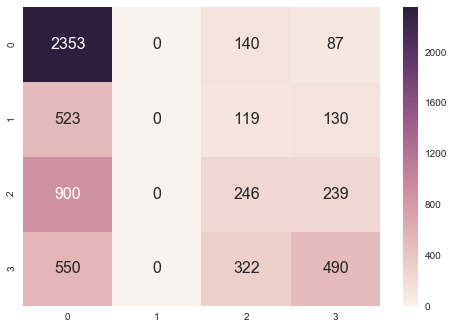

In [24]:
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.401377274963

             precision    recall  f1-score   support

          1       0.63      0.42      0.51      2580
          2       0.38      0.00      0.01       772
          3       0.28      0.43      0.34      1385
          4       0.34      0.55      0.42      1362

avg / total       0.45      0.40      0.39      6099

macro precision:  0.406055090866
micro precision:  0.401377274963

micro recall:  0.401377274963
macro recall:  0.353227054382

micro f1:  0.401377274963
macro f1:  0.318806634109


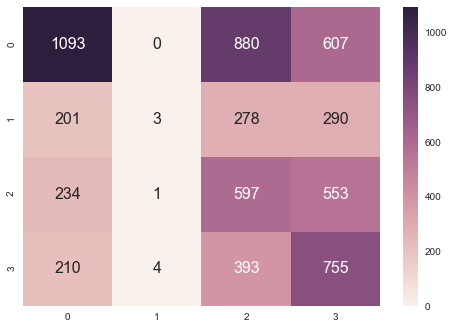

In [25]:
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.261190359075

             precision    recall  f1-score   support

          1       0.80      0.13      0.23      2580
          2       0.13      0.25      0.17       772
          3       0.26      0.74      0.38      1385
          4       0.17      0.03      0.04      1362

avg / total       0.45      0.26      0.21      6099

macro precision:  0.337977495715
micro precision:  0.261190359075

micro recall:  0.261190359075
macro recall:  0.286458176548

micro f1:  0.261190359075
macro f1:  0.205609041259


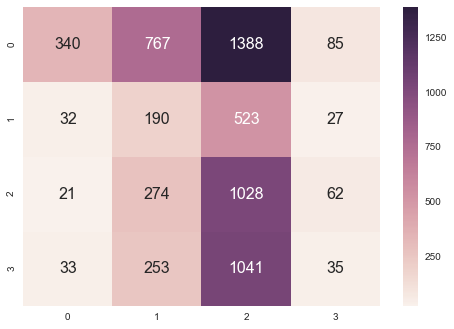

In [26]:
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy:  0.179209706509

             precision    recall  f1-score   support

          1       0.92      0.03      0.06      2580
          2       0.13      0.93      0.24       772
          3       0.42      0.20      0.27      1385
          4       0.41      0.01      0.03      1362

avg / total       0.59      0.18      0.12      6099

macro precision:  0.470991447871
micro precision:  0.179209706509

micro recall:  0.179209706509
macro recall:  0.292888051194

micro f1:  0.179209706509
macro f1:  0.148428587357


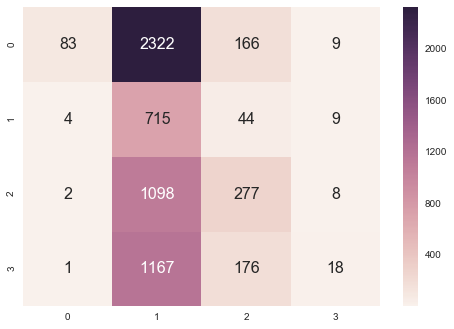

In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

In [28]:
#from sklearn.neighbors import RadiusNeighborsClassifier
#train_eval(RadiusNeighborsClassifier)

accuracy:  0.584522052796

             precision    recall  f1-score   support

          1       0.68      0.83      0.75      2580
          2       0.37      0.22      0.28       772
          3       0.45      0.41      0.42      1385
          4       0.55      0.50      0.53      1362

avg / total       0.56      0.58      0.57      6099

macro precision:  0.513941542616
micro precision:  0.584522052796

micro recall:  0.584522052796
macro recall:  0.490426280476

micro f1:  0.584522052796
macro f1:  0.494886458785


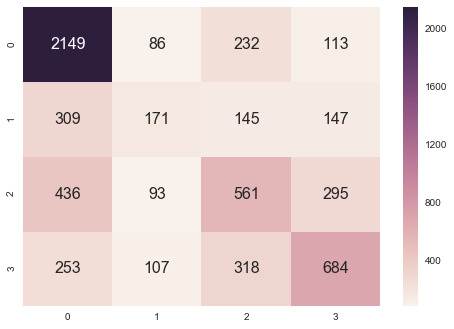

In [29]:
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6736752783878245e-17 / 1.1102230246251565e-16
  RuntimeWarning)


accuracy:  0.542383997377

             precision    recall  f1-score   support

          1       0.56      0.88      0.69      2580
          2       0.00      0.00      0.00       772
          3       0.48      0.29      0.36      1385
          4       0.52      0.48      0.50      1362

avg / total       0.46      0.54      0.48      6099

macro precision:  0.38964513861
micro precision:  0.542383997377

micro recall:  0.542383997377
macro recall:  0.410149338134

micro f1:  0.542383997377
macro f1:  0.385177015499


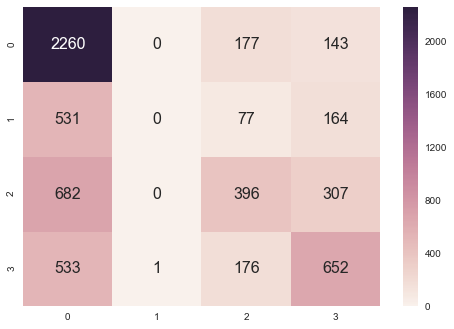

In [30]:
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.542875881292

             precision    recall  f1-score   support

          1       0.56      0.88      0.69      2580
          2       0.00      0.00      0.00       772
          3       0.48      0.28      0.36      1385
          4       0.52      0.48      0.50      1362

avg / total       0.46      0.54      0.48      6099

macro precision:  0.390660370951
micro precision:  0.542875881292

micro recall:  0.542875881292
macro recall:  0.410186169055

micro f1:  0.542875881292
macro f1:  0.385239979292


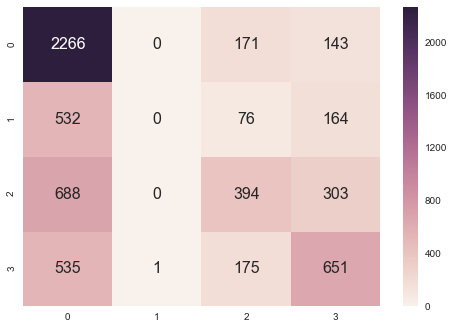

In [31]:
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.48466961797

             precision    recall  f1-score   support

          1       0.46      0.95      0.62      2580
          2       0.69      0.15      0.25       772
          3       0.63      0.16      0.25      1385
          4       0.62      0.13      0.21      1362

avg / total       0.56      0.48      0.40      6099

macro precision:  0.600293599731
micro precision:  0.48466961797

micro recall:  0.48466961797
macro recall:  0.346399811269

micro f1:  0.48466961797
macro f1:  0.3332283304


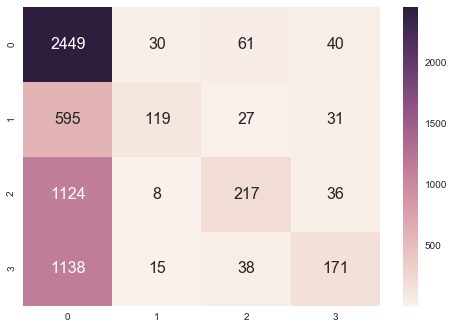

In [32]:
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.488768650598

             precision    recall  f1-score   support

          1       0.46      0.99      0.62      2580
          2       0.99      0.13      0.24       772
          3       0.83      0.14      0.23      1385
          4       0.75      0.10      0.18      1362

avg / total       0.68      0.49      0.39      6099

macro precision:  0.757456177135
micro precision:  0.488768650598

micro recall:  0.488768650598
macro recall:  0.339990764702

micro f1:  0.488768650598
macro f1:  0.318278778598


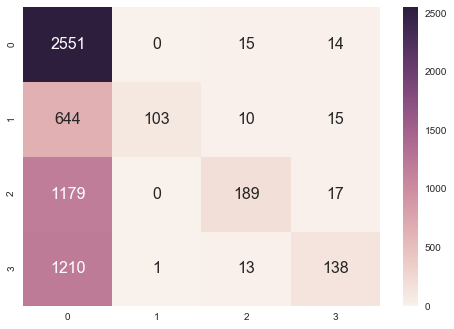

In [33]:
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.489424495819

             precision    recall  f1-score   support

          1       0.57      0.72      0.64      2580
          2       0.28      0.23      0.25       772
          3       0.40      0.33      0.36      1385
          4       0.46      0.36      0.41      1362

avg / total       0.47      0.49      0.47      6099

macro precision:  0.427995629491
micro precision:  0.489424495819

micro recall:  0.489424495819
macro recall:  0.410540551438

micro f1:  0.489424495819
macro f1:  0.41429071734


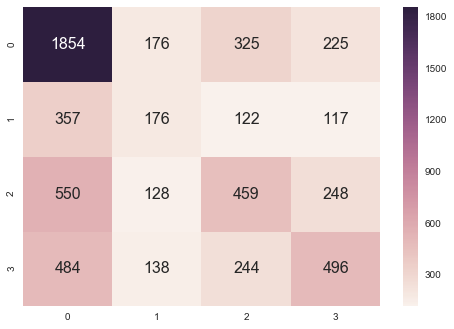

In [34]:
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.595179537629

             precision    recall  f1-score   support

          1       0.68      0.85      0.76      2580
          2       0.35      0.02      0.04       772
          3       0.46      0.45      0.46      1385
          4       0.53      0.58      0.56      1362

avg / total       0.56      0.60      0.55      6099

macro precision:  0.50638676775
micro precision:  0.595179537629

micro recall:  0.595179537629
macro recall:  0.47697615911

micro f1:  0.595179537629
macro f1:  0.453882981088


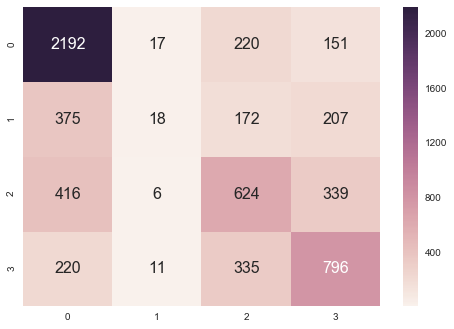

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

In [36]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#train_eval(GaussianProcessClassifier, True)

accuracy:  0.34218724381

             precision    recall  f1-score   support

          1       0.40      0.64      0.49      2580
          2       0.13      0.23      0.16       772
          3       0.00      0.00      0.00      1385
          4       0.44      0.18      0.26      1362

avg / total       0.28      0.34      0.29      6099

macro precision:  0.241675858718
micro precision:  0.34218724381

micro recall:  0.34218724381
macro recall:  0.263605895496

micro f1:  0.34218724381
macro f1:  0.22886647952


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

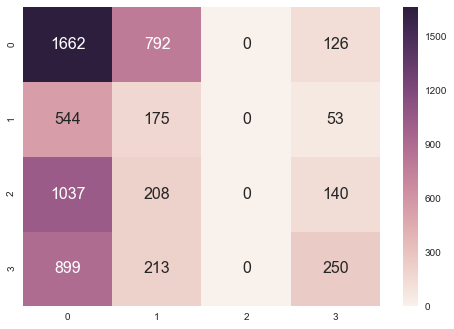

In [37]:
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

In [38]:
#from sklearn.linear_model import LogisticRegression
#train_eval(LogisticRegression, True, multi_class='ovr')

In [39]:
#from sklearn.linear_model import LogisticRegressionCV
#train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.264961469093

             precision    recall  f1-score   support

          1       0.62      0.23      0.33      2580
          2       0.12      0.40      0.19       772
          3       0.25      0.01      0.02      1385
          4       0.27      0.52      0.36      1362

avg / total       0.40      0.26      0.25      6099

macro precision:  0.318108114829
micro precision:  0.264961469093

micro recall:  0.264961469093
macro recall:  0.289010186847

micro f1:  0.264961469093
macro f1:  0.224937703047


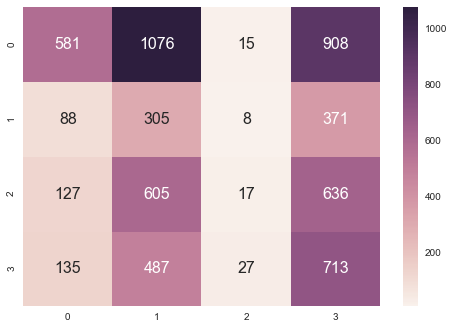

In [40]:
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.264961469093

             precision    recall  f1-score   support

          1       0.62      0.23      0.33      2580
          2       0.12      0.40      0.19       772
          3       0.25      0.01      0.02      1385
          4       0.27      0.52      0.36      1362

avg / total       0.40      0.26      0.25      6099

macro precision:  0.318108114829
micro precision:  0.264961469093

micro recall:  0.264961469093
macro recall:  0.289010186847

micro f1:  0.264961469093
macro f1:  0.224937703047


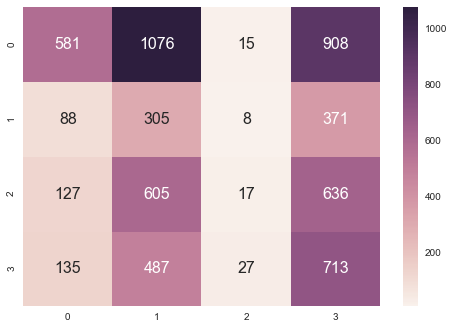

In [41]:
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.196261682243

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      2580
          2       0.13      0.63      0.21       772
          3       0.00      0.00      0.00      1385
          4       0.32      0.52      0.40      1362

avg / total       0.09      0.20      0.12      6099

macro precision:  0.111793413306
micro precision:  0.196261682243

micro recall:  0.196261682243
macro recall:  0.288030308218

micro f1:  0.196261682243
macro f1:  0.151726162657


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

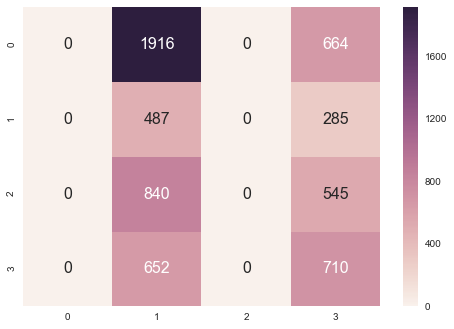

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)

### Results

In [43]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']]\
.sort_values(by=['Algoritmus', 'Transformácia'])

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
0,BernoulliNB,nie,0.52,0.61,0.27,0.46,0.41,0.77,0.01,0.28,0.59,0.38
1,DecisionTreeClassifier,nie,0.52,0.71,0.25,0.41,0.45,0.68,0.27,0.42,0.45,0.46
2,ExtraTreeClassifier,nie,0.49,0.65,0.25,0.40,0.44,0.64,0.26,0.41,0.42,0.43
3,ExtraTreesClassifier,nie,0.58,0.66,0.35,0.48,0.55,0.84,0.20,0.44,0.46,0.49
4,GaussianNB,nie,0.27,0.92,0.14,0.25,0.23,0.08,0.08,0.93,0.05,0.18
17,GaussianProcessClassifier,nie,0.49,0.57,0.28,0.40,0.46,0.72,0.23,0.33,0.36,0.41
18,GradientBoostingClassifier,nie,0.60,0.68,0.35,0.46,0.53,0.85,0.02,0.45,0.58,0.45
5,KNeighborsClassifier,nie,0.47,0.56,0.18,0.33,0.46,0.75,0.12,0.29,0.31,0.37
6,LinearDiscriminantAnalysis,nie,0.54,0.58,0.00,0.45,0.51,0.84,0.00,0.34,0.48,0.39
19,LinearSVC,nie,0.34,0.40,0.13,0.00,0.44,0.64,0.23,0.00,0.18,0.23


## Transformed data (RobustScaler + Box-cox)

In [44]:
# prepare transformed data 
X_train = pd.read_csv('data/split/transformed/train.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test.csv', index_col=0)

# merge with categorical
X_train = pd.concat([X_train, categorical_train], axis=1)
X_test = pd.concat([X_test, categorical_test], axis=1)

# as we will use only static (meta) data, we can use all projects for prediction
#X_train = X_train[(X_train['ratio_running_duration_original'] >= 0) & (X_train['ratio_running_duration_original'] < 25)]
#X_test = X_test[(X_test['ratio_running_duration_original'] >= 0) & (X_test['ratio_running_duration_original'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)
X_test.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)

In [45]:
X_train.shape

(18296, 101)

In [46]:
X_test.shape

(6099, 101)

In [47]:
X_train.drop(dynamic_data, axis=1, inplace=True)
X_test.drop(dynamic_data, axis=1, inplace=True)

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18296 entries, 0 to 18295
Data columns (total 83 columns):
category_position               18296 non-null float64
days_duration                   18296 non-null float64
days_preparation                18296 non-null float64
db_duration                     18296 non-null float64
goal                            18296 non-null float64
usd_goal                        18296 non-null float64
deadline_year                   18296 non-null float64
deadline_month                  18296 non-null float64
deadline_day                    18296 non-null float64
deadline_dayofweek              18296 non-null float64
deadline_hour                   18296 non-null float64
launch_year                     18296 non-null float64
launch_month                    18296 non-null float64
launch_day                      18296 non-null float64
launch_dayofweek                18296 non-null float64
launch_hour                     18296 non-null float64
image_count

In [49]:
transformed = True

## Classifiers

accuracy:  0.524184292507

             precision    recall  f1-score   support

          1       0.61      0.78      0.68      2580
          2       0.28      0.01      0.02       772
          3       0.46      0.28      0.35      1385
          4       0.41      0.58      0.48      1362

avg / total       0.49      0.52      0.48      6099

macro precision:  0.439758030579
micro precision:  0.524184292507

micro recall:  0.524184292507
macro recall:  0.413305041688

micro f1:  0.524184292507
macro f1:  0.384462640441


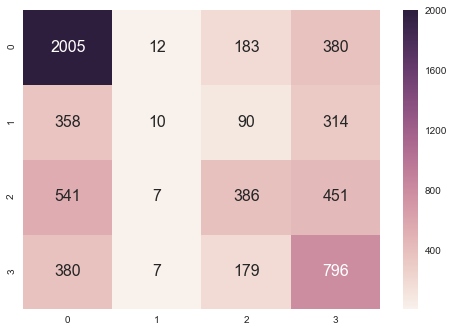

In [50]:
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.504017051976

             precision    recall  f1-score   support

          1       0.70      0.64      0.67      2580
          2       0.26      0.26      0.26       772
          3       0.38      0.41      0.39      1385
          4       0.44      0.47      0.45      1362

avg / total       0.51      0.50      0.51      6099

macro precision:  0.445954540882
micro precision:  0.504017051976

micro recall:  0.504017051976
macro recall:  0.447011219

micro f1:  0.504017051976
macro f1:  0.445900334279


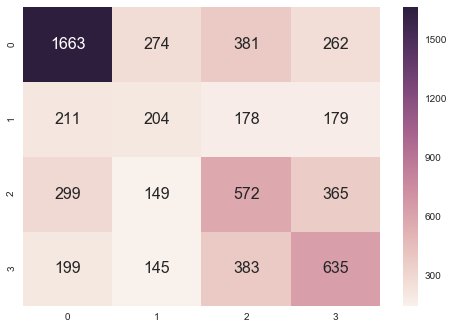

In [51]:
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.491392031481

             precision    recall  f1-score   support

          1       0.67      0.66      0.66      2580
          2       0.25      0.25      0.25       772
          3       0.37      0.37      0.37      1385
          4       0.43      0.44      0.43      1362

avg / total       0.49      0.49      0.49      6099

macro precision:  0.427778565347
micro precision:  0.491392031481

micro recall:  0.491392031481
macro recall:  0.4282367229

micro f1:  0.491392031481
macro f1:  0.427992608253


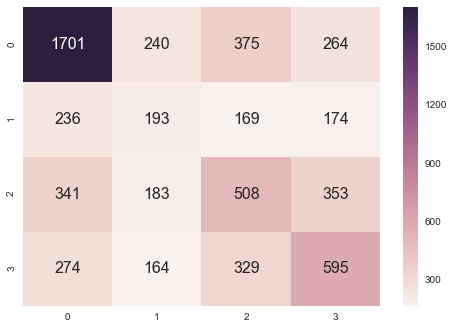

In [52]:
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.596327266765

             precision    recall  f1-score   support

          1       0.70      0.83      0.76      2580
          2       0.39      0.18      0.25       772
          3       0.48      0.46      0.47      1385
          4       0.53      0.52      0.53      1362

avg / total       0.57      0.60      0.58      6099

macro precision:  0.524703318949
micro precision:  0.596327266765

micro recall:  0.596327266765
macro recall:  0.499533436239

micro f1:  0.596327266765
macro f1:  0.501584234309


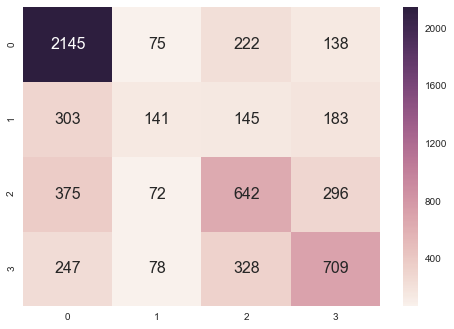

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.260862436465

             precision    recall  f1-score   support

          1       0.72      0.25      0.37      2580
          2       0.15      0.87      0.25       772
          3       0.49      0.15      0.22      1385
          4       0.52      0.06      0.11      1362

avg / total       0.55      0.26      0.26      6099

macro precision:  0.467065983783
micro precision:  0.260862436465

micro recall:  0.260862436465
macro recall:  0.331031340687

micro f1:  0.260862436465
macro f1:  0.236663115381


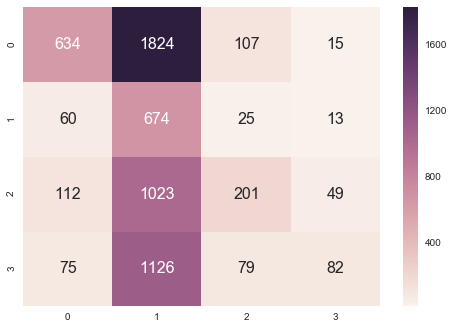

In [54]:
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.442367601246

             precision    recall  f1-score   support

          1       0.53      0.72      0.61      2580
          2       0.18      0.11      0.14       772
          3       0.34      0.30      0.32      1385
          4       0.37      0.24      0.29      1362

avg / total       0.41      0.44      0.42      6099

macro precision:  0.35607822125
micro precision:  0.442367601246

micro recall:  0.442367601246
macro recall:  0.345124073606

micro f1:  0.442367601246
macro f1:  0.341803305896


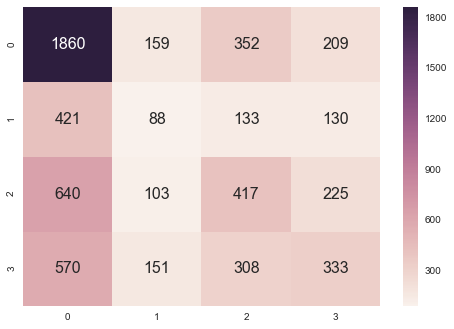

In [55]:
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy:  0.574028529267

             precision    recall  f1-score   support

          1       0.68      0.81      0.74      2580
          2       0.31      0.02      0.04       772
          3       0.46      0.38      0.42      1385
          4       0.48      0.64      0.55      1362

avg / total       0.54      0.57      0.53      6099

macro precision:  0.480886231243
micro precision:  0.574028529267

micro recall:  0.574028529267
macro recall:  0.463176215108

micro f1:  0.574028529267
macro f1:  0.435684527427


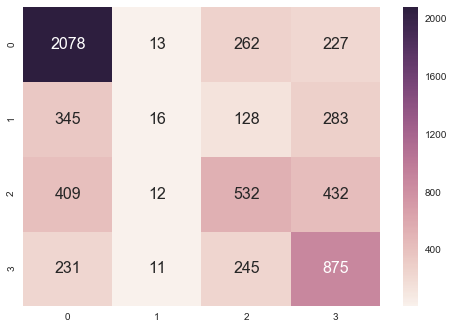

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

In [57]:
#from sklearn.svm import LinearSVC
#train_eval(LinearSVC, True, multi_class='crammer_singer')

accuracy:  0.57091326447

             precision    recall  f1-score   support

          1       0.67      0.82      0.74      2580
          2       0.37      0.01      0.02       772
          3       0.44      0.37      0.41      1385
          4       0.48      0.61      0.54      1362

avg / total       0.54      0.57      0.53      6099

macro precision:  0.490336479816
micro precision:  0.57091326447

micro recall:  0.57091326447
macro recall:  0.454829362255

micro f1:  0.57091326447
macro f1:  0.425184271968


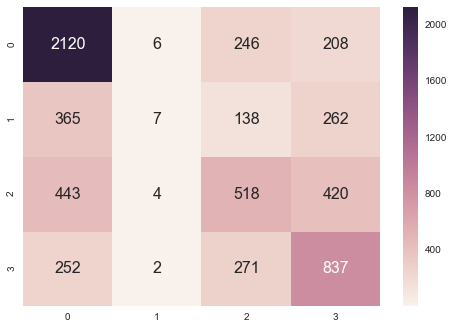

In [58]:
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.570257419249

             precision    recall  f1-score   support

          1       0.67      0.82      0.74      2580
          2       0.42      0.01      0.02       772
          3       0.44      0.37      0.40      1385
          4       0.48      0.62      0.54      1362

avg / total       0.54      0.57      0.53      6099

macro precision:  0.502793486472
micro precision:  0.570257419249

micro recall:  0.570257419249
macro recall:  0.454838960891

micro f1:  0.570257419249
macro f1:  0.425463402531


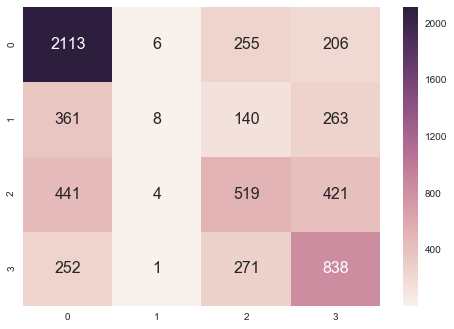

In [59]:
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.576487948844

             precision    recall  f1-score   support

          1       0.68      0.82      0.74      2580
          2       0.20      0.06      0.09       772
          3       0.46      0.43      0.44      1385
          4       0.52      0.55      0.54      1362

avg / total       0.53      0.58      0.55      6099

macro precision:  0.465668661337
micro precision:  0.576487948844

micro recall:  0.576487948844
macro recall:  0.466303369711

micro f1:  0.576487948844
macro f1:  0.454081186526


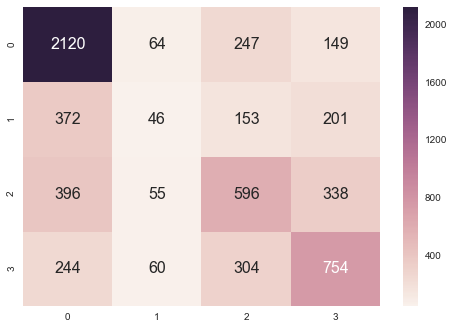

In [60]:
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.357927529103

             precision    recall  f1-score   support

          1       0.56      0.40      0.47      2580
          2       0.16      0.05      0.07       772
          3       0.30      0.31      0.30      1385
          4       0.27      0.50      0.35      1362

avg / total       0.38      0.36      0.35      6099

macro precision:  0.318854164434
micro precision:  0.357927529103

micro recall:  0.357927529103
macro recall:  0.314779590844

micro f1:  0.357927529103
macro f1:  0.296994699383


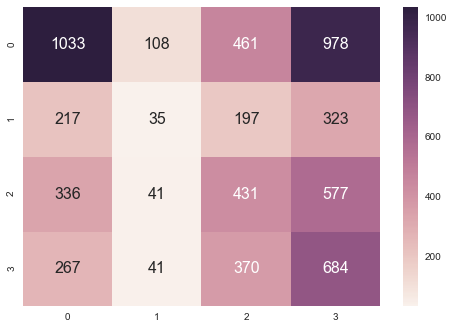

In [61]:
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy:  0.150024594196

             precision    recall  f1-score   support

          1       0.58      0.02      0.05      2580
          2       0.13      0.97      0.23       772
          3       0.38      0.08      0.13      1385
          4       0.40      0.00      0.00      1362

avg / total       0.44      0.15      0.08      6099

macro precision:  0.371619275374
micro precision:  0.150024594196

micro recall:  0.150024594196
macro recall:  0.266908238606

micro f1:  0.150024594196
macro f1:  0.101380768205


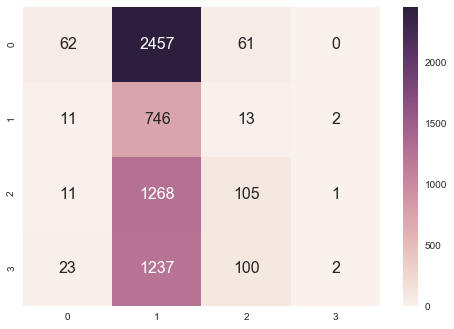

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

In [63]:
#from sklearn.neighbors import RadiusNeighborsClassifier
#train_eval(RadiusNeighborsClassifier)

accuracy:  0.582718478439

             precision    recall  f1-score   support

          1       0.70      0.80      0.75      2580
          2       0.39      0.19      0.25       772
          3       0.44      0.43      0.44      1385
          4       0.53      0.54      0.54      1362

avg / total       0.56      0.58      0.57      6099

macro precision:  0.513455699261
micro precision:  0.582718478439

micro recall:  0.582718478439
macro recall:  0.490686224224

micro f1:  0.582718478439
macro f1:  0.492231140085


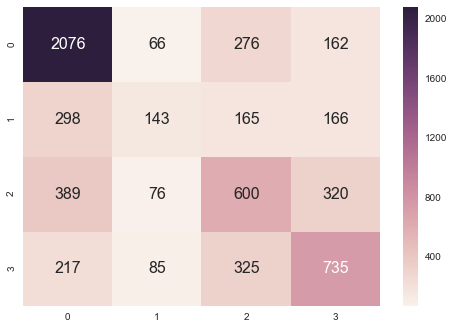

In [64]:
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

accuracy:  0.573372684047

             precision    recall  f1-score   support

          1       0.64      0.85      0.73      2580
          2       0.50      0.00      0.00       772
          3       0.50      0.31      0.38      1385
          4       0.48      0.64      0.55      1362

avg / total       0.56      0.57      0.52      6099

macro precision:  0.53006368962
micro precision:  0.573372684047

micro recall:  0.573372684047
macro recall:  0.450441779442

micro f1:  0.573372684047
macro f1:  0.415822647996


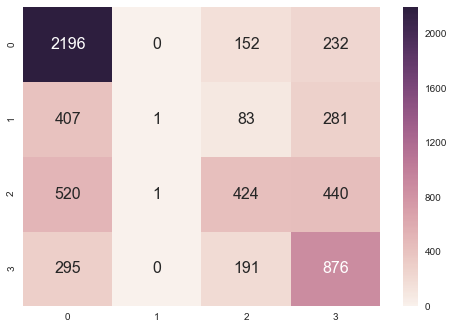

In [65]:
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.571733070995

             precision    recall  f1-score   support

          1       0.64      0.85      0.73      2580
          2       0.50      0.00      0.00       772
          3       0.50      0.31      0.38      1385
          4       0.48      0.64      0.55      1362

avg / total       0.55      0.57      0.52      6099

macro precision:  0.528690818151
micro precision:  0.571733070995

micro recall:  0.571733070995
macro recall:  0.448779552211

micro f1:  0.571733070995
macro f1:  0.414477161851


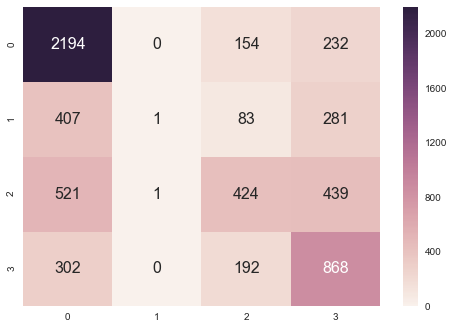

In [66]:
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.43482538121

             precision    recall  f1-score   support

          1       0.60      0.64      0.62      2580
          2       0.18      0.28      0.21       772
          3       0.32      0.24      0.28      1385
          4       0.40      0.32      0.36      1362

avg / total       0.44      0.43      0.43      6099

macro precision:  0.3769358121
micro precision:  0.43482538121

micro recall:  0.43482538121
macro recall:  0.371930692787

micro f1:  0.43482538121
macro f1:  0.368867364366


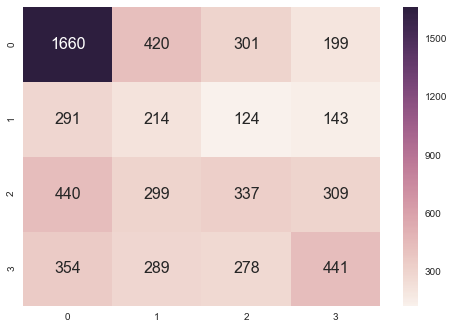

In [67]:
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.571733070995

             precision    recall  f1-score   support

          1       0.65      0.85      0.73      2580
          2       0.00      0.00      0.00       772
          3       0.48      0.33      0.39      1385
          4       0.48      0.62      0.54      1362

avg / total       0.49      0.57      0.52      6099

macro precision:  0.401445227656
micro precision:  0.571733070995

micro recall:  0.571733070995
macro recall:  0.449389984406

micro f1:  0.571733070995
macro f1:  0.416538008349


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

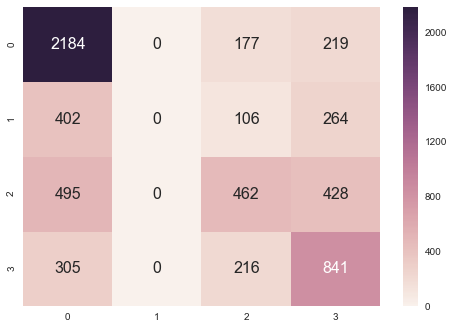

In [68]:
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.543039842597

             precision    recall  f1-score   support

          1       0.56      0.90      0.69      2580
          2       0.80      0.05      0.10       772
          3       0.47      0.31      0.38      1385
          4       0.51      0.39      0.44      1362

avg / total       0.56      0.54      0.49      6099

macro precision:  0.587058587902
micro precision:  0.543039842597

micro recall:  0.543039842597
macro recall:  0.41196566891

micro f1:  0.543039842597
macro f1:  0.401630087201


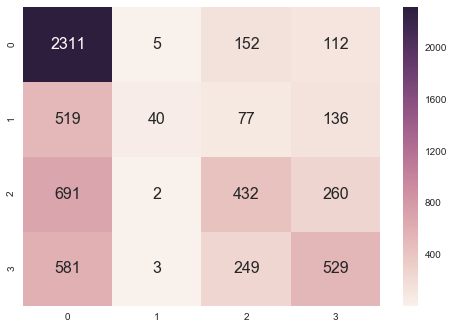

In [69]:
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.594523692409

             precision    recall  f1-score   support

          1       0.72      0.82      0.77      2580
          2       0.33      0.03      0.06       772
          3       0.45      0.47      0.46      1385
          4       0.51      0.60      0.55      1362

avg / total       0.56      0.59      0.56      6099

macro precision:  0.50289750277
micro precision:  0.594523692409

micro recall:  0.594523692409
macro recall:  0.482618620711

micro f1:  0.594523692409
macro f1:  0.459490483584


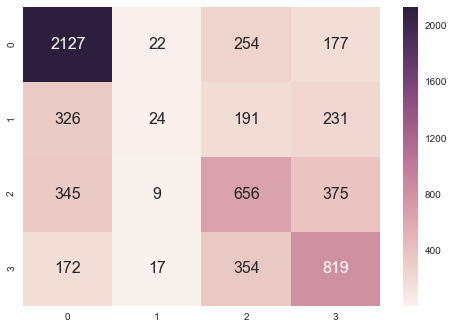

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

In [71]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#train_eval(GaussianProcessClassifier, True)

accuracy:  0.571077225775

             precision    recall  f1-score   support

          1       0.64      0.85      0.73      2580
          2       1.00      0.00      0.00       772
          3       0.44      0.39      0.42      1385
          4       0.52      0.55      0.53      1362

avg / total       0.61      0.57      0.52      6099

macro precision:  0.649759148385
micro precision:  0.571077225775

micro recall:  0.571077225775
macro recall:  0.447933422676

micro f1:  0.571077225775
macro f1:  0.42021219313


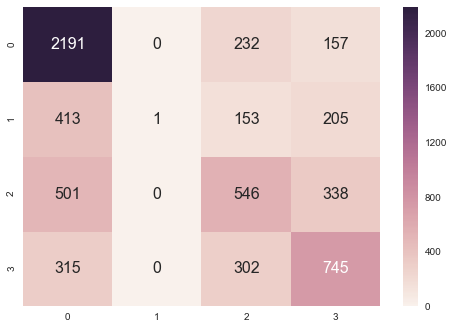

In [72]:
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

In [73]:
#from sklearn.linear_model import LogisticRegression
#train_eval(LogisticRegression, True, multi_class='ovr')

In [74]:
#from sklearn.linear_model import LogisticRegressionCV
#train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.237907853747

             precision    recall  f1-score   support

          1       0.91      0.21      0.34      2580
          2       0.14      0.92      0.25       772
          3       0.38      0.12      0.18      1385
          4       0.59      0.02      0.05      1362

avg / total       0.62      0.24      0.23      6099

macro precision:  0.507040453883
micro precision:  0.237907853747

micro recall:  0.237907853747
macro recall:  0.318268683115

micro f1:  0.237907853747
macro f1:  0.203298711811


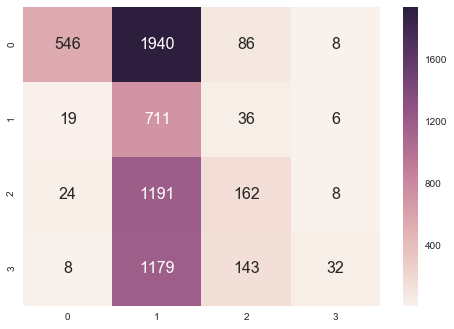

In [75]:
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.282505328742

             precision    recall  f1-score   support

          1       0.91      0.29      0.44      2580
          2       0.15      0.86      0.25       772
          3       0.37      0.18      0.25      1385
          4       0.62      0.04      0.08      1362

avg / total       0.63      0.28      0.29      6099

macro precision:  0.51246837488
micro precision:  0.282505328742

micro recall:  0.282505328742
macro recall:  0.34433128728

micro f1:  0.282505328742
macro f1:  0.254762171657


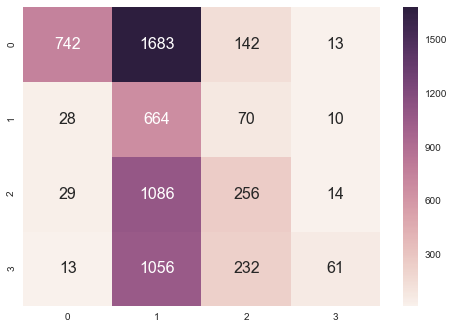

In [76]:
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.288735858337

             precision    recall  f1-score   support

          1       0.86      0.36      0.51      2580
          2       0.15      0.87      0.25       772
          3       0.35      0.09      0.14      1385
          4       0.65      0.02      0.04      1362

avg / total       0.61      0.29      0.29      6099

macro precision:  0.500410934684
micro precision:  0.288735858337

micro recall:  0.288735858337
macro recall:  0.335882748125

micro f1:  0.288735858337
macro f1:  0.236352247332


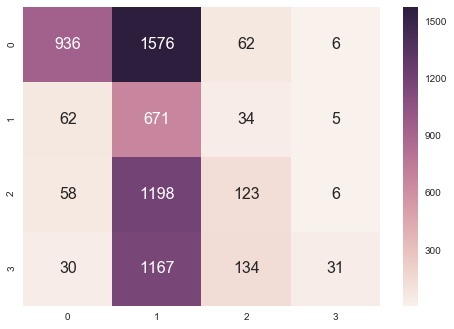

In [77]:
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)

### Results

In [78]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']] \
.sort_values(by=['Algoritmus', 'Transformácia'])

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
0,BernoulliNB,nie,0.52,0.61,0.27,0.46,0.41,0.77,0.01,0.28,0.59,0.38
23,BernoulliNB,áno,0.52,0.61,0.28,0.46,0.41,0.78,0.01,0.28,0.58,0.38
1,DecisionTreeClassifier,nie,0.52,0.71,0.25,0.41,0.45,0.68,0.27,0.42,0.45,0.46
24,DecisionTreeClassifier,áno,0.50,0.70,0.26,0.38,0.44,0.64,0.26,0.41,0.47,0.45
2,ExtraTreeClassifier,nie,0.49,0.65,0.25,0.40,0.44,0.64,0.26,0.41,0.42,0.43
25,ExtraTreeClassifier,áno,0.49,0.67,0.25,0.37,0.43,0.66,0.25,0.37,0.44,0.43
3,ExtraTreesClassifier,nie,0.58,0.66,0.35,0.48,0.55,0.84,0.20,0.44,0.46,0.49
26,ExtraTreesClassifier,áno,0.60,0.70,0.39,0.48,0.53,0.83,0.18,0.46,0.52,0.50
4,GaussianNB,nie,0.27,0.92,0.14,0.25,0.23,0.08,0.08,0.93,0.05,0.18
27,GaussianNB,áno,0.26,0.72,0.15,0.49,0.52,0.25,0.87,0.15,0.06,0.24


### Results sorted by Accuracy

In [79]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']] \
.sort_values(by=['S'], ascending=False)

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
26,ExtraTreesClassifier,áno,0.60,0.70,0.39,0.48,0.53,0.83,0.18,0.46,0.52,0.50
18,GradientBoostingClassifier,nie,0.60,0.68,0.35,0.46,0.53,0.85,0.02,0.45,0.58,0.45
41,GradientBoostingClassifier,áno,0.59,0.72,0.33,0.45,0.51,0.82,0.03,0.47,0.60,0.46
35,RandomForestClassifier,áno,0.58,0.70,0.39,0.44,0.53,0.80,0.19,0.43,0.54,0.49
3,ExtraTreesClassifier,nie,0.58,0.66,0.35,0.48,0.55,0.84,0.20,0.44,0.46,0.49
32,MLPClassifier,áno,0.58,0.68,0.20,0.46,0.52,0.82,0.06,0.43,0.55,0.45
12,RandomForestClassifier,nie,0.58,0.68,0.37,0.45,0.55,0.83,0.22,0.41,0.50,0.49
29,LinearDiscriminantAnalysis,áno,0.57,0.68,0.31,0.46,0.48,0.81,0.02,0.38,0.64,0.44
30,LogisticRegression,áno,0.57,0.67,0.37,0.44,0.48,0.82,0.01,0.37,0.61,0.43
31,LogisticRegressionCV,áno,0.57,0.67,0.42,0.44,0.48,0.82,0.01,0.37,0.62,0.43


In [80]:
# store results
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']]\
.sort_values(by=['Algoritmus', 'Transformácia']).to_csv('results/meta.csv')

In [81]:
df_results.describe()

,F1_makro,P_0,P_1,P_2,P_3,S,Ú_0,Ú_1,Ú_2,Ú_3
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.354348,0.639348,0.278043,0.400870,0.464130,0.454783,0.633478,0.229348,0.308043,0.396522
std,0.106053,0.150383,0.228061,0.133497,0.111227,0.135724,0.292910,0.296666,0.176681,0.212584
min,0.100000,0.000000,0.000000,0.000000,0.170000,0.150000,0.000000,0.000000,0.000000,0.000000
25%,0.262500,0.572500,0.132500,0.342500,0.410000,0.345000,0.405000,0.010000,0.185000,0.257500
50%,0.390000,0.640000,0.250000,0.440000,0.480000,0.505000,0.775000,0.125000,0.310000,0.480000
75%,0.430000,0.695000,0.365000,0.467500,0.520000,0.570000,0.847500,0.260000,0.410000,0.550000
max,0.500000,0.920000,1.000000,0.830000,0.750000,0.600000,0.990000,0.970000,0.930000,0.640000
